# Structures des bandes électroniques
Ce code a pour but d'analyser **propriétés électroniques** du cristal **MgI2** (mp-23205) à partir des données fournies sur site du Materials Project [1].

Le fichier exploité ci-dessous est le fichier CIF du MgI2 [2] téléchargé sur le site du Materials Project et les images sont issues du site du Materials Project.

La reflexion théorique sous-jacente à ce code est inspirée du cours *LMAPR1492 - Physique des matériaux*, donné par le professeur Gian-Marco RIGNANESE [3].

In [102]:
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.ext.matproj import MPRester
with MPRester("ktopgq8J6C3OwUSa") as m:
    
    #Get a BandStructure corresponding to a material_id.
    #Returns : A BandStructure object.
    bstructure = m.get_bandstructure_by_material_id("mp-23205")
    
#Class to plot or get data to facilitate the plot of band structure objects.
bs = BSPlotter(bstructure)

#Get the data nicely formatted for a plot
#Returns : A dictionnary 
bsp = bs.bs_plot_data()


# 0. Zone de Brillouin
"Pour tout vecteur d'onde **k** il est possible de ramener l'énergie propre associée à une énergie d'un point de la première zone de Brillouin"

Sur le shéma ci-dessous, on peut voir la fome de la suface de Fermi dans la première zone de Brillouin (en noir).

Dans le suite de ce code, nous nous attarderons plus en détails sur les points critiques (en bleu) illustrés ci-dessous.

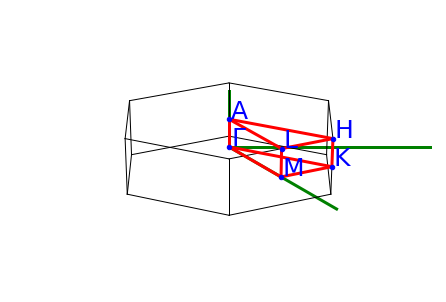

In [103]:
import numpy as np
import matplotlib.pyplot as plt    
#plot the Brillouin zone
bs.plot_brillouin()

# 1. Bande interdite

La bande interdite est la bande de niveaux d'énergie qui ne peuvent pas être occupés par les électrons. 

Cette dernière est caluclée dans le code suivant : 

In [104]:
# band_gap: A string indicating the band gap and its nature (empty if it’s a metal).
bg = bstructure.get_band_gap()
print(bg)

{'direct': False, 'energy': 3.6162000000000005, 'transition': '\\Gamma-(0.500,0.000,0.444)'}


Pour le MgI2, La bande interdite 
* est **indirecte** : le maximum de la dernière bande de valence n'est pas aligné avec le minimum de la première bande de conduction. 
* vaut **3,6162 eV** : il s'agit d'un isolant électrique
* k évolue selon la direction $\Gamma$ - A|L de la zone de brillouin du cristal.

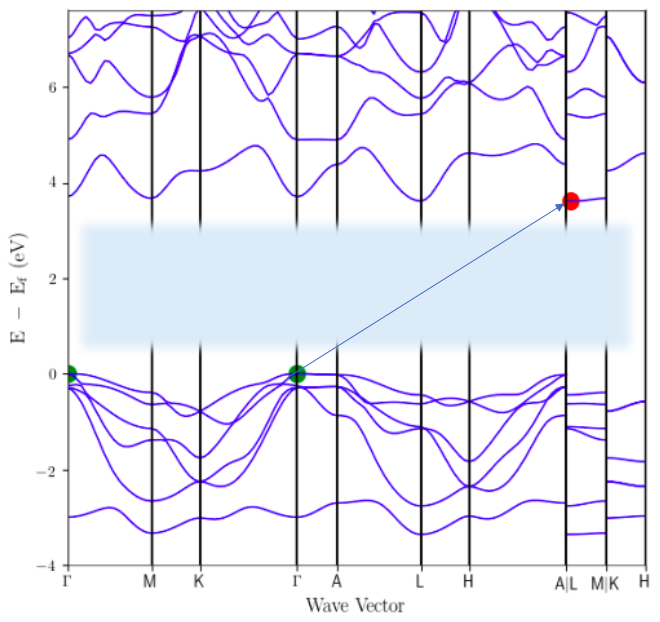

In [105]:
from IPython.display import Image
Image(filename='band_int.png')

# 2. Dispertion
Pour calculer le maximum (et le minimum) de dispersion, j'observe la valeur absolue de la pente la plus (et la moins) élevée pour chaque direction.

La pente se calcule comme un rapport de l'énergie sur la distance.

Les direction se traduisent dans le code par:
0. $\Gamma$ - M 
1. M - K 
2. K - $\Gamma$ 
3. $\Gamma$ - A
4. A - L
5. L - H
6. A|L - M|K
7. M|K - H
8. H - $\Gamma$


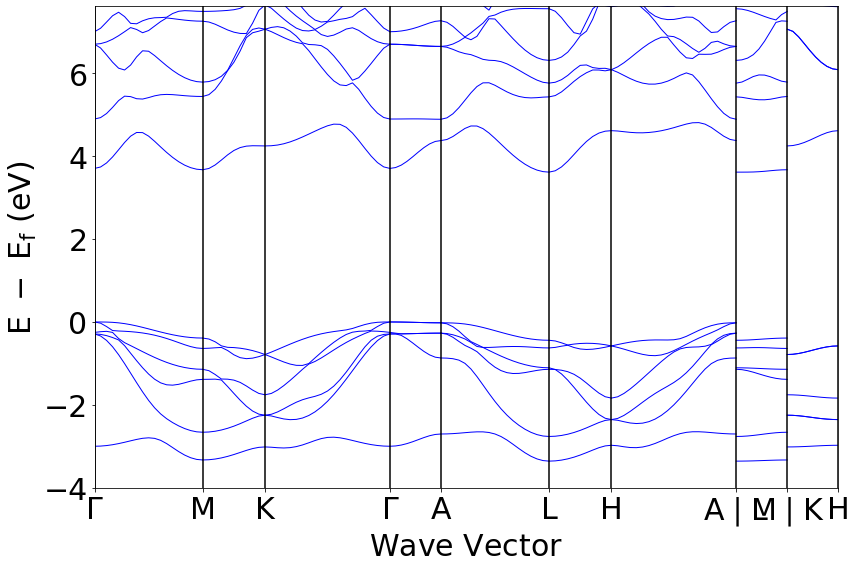

In [106]:
#Get a matplotlib object for the bandstructure plot. Blue lines are up spin, red lines are down spin.
bsPlot = bs.get_plot()

## 2.1. Dans la dernière bande de valence

In [107]:
# vbm: A list of tuples (distance,energy) marking the vbms. The energies are shifted with respect to the fermi level is the option has been selected.
# dernière bande de valence : 15

# energy: A dict storing bands for spin up and spin down data [{Spin:[band_index][k_point_index]}] as a list (one element for each branch) of energy for each kpoint. 
#The data is stored by branch to facilitate the plotting. 

k_g = 0
energie_g = 0 
k_d = 0 
energie_d = 0

count = 0

for k, energie in zip(bsp["distances"], bsp["energy"]):
    
    e = len(energie['1'][15])
    d = len(k)

    k_g = k[0] 
    energie_g = energie['1'][15][0] 
    
    k_d = k[d-1] 
    energie_d = energie['1'][15][e-1]
    
    pente = np.abs((energie_d-energie_g)/(k_d-k_g))
    print('Pente pour la direction ' + str(count) + ' : ' + str(pente))
    count = count+1

Pente pour la direction 0 : 0.5692966185963797
Pente pour la direction 1 : 1.2141728449329703
Pente pour la direction 2 : 1.1001117939532528
Pente pour la direction 3 : 0.6531338962915438
Pente pour la direction 4 : 0.33628650645990793
Pente pour la direction 5 : 1.6058998561520312
Pente pour la direction 6 : 1.0941826265244348
Pente pour la direction 7 : 0.1589768263015609
Pente pour la direction 8 : 0.6386143409482143


La pente maximale de la dernière bande de valence vaut **1.6058998561520312** dans la direction **L - H**.

La pente minimale de la dernière bande de valence vaut **0.1589768263015609** dans la direction **M|K - H**.

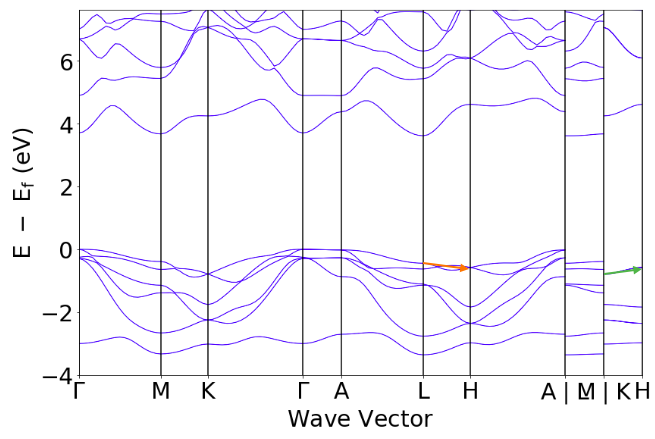

In [108]:
from IPython.display import Image
Image(filename='band_val.png')

## 2.2. Dans la première bande de conduction

In [109]:
# cbm: A list of tuples (distance,energy) marking the cbms. The energies are shifted with respect to the fermi level is the option has been selected.
# première bande de conduction : 16

# energy: A dict storing bands for spin up and spin down data [{Spin:[band_index][k_point_index]}] as a list (one element for each branch) of energy for each kpoint. 
#The data is stored by branch to facilitate the plotting. 

k_g = 0
energie_g = 0 
k_d = 0 
energie_d = 0

count = 0

for k, energie in zip(bsp["distances"], bsp["energy"]):
    
    e = len(energie['1'][16])
    d = len(k)

    k_g = k[0] 
    energie_g = energie['1'][16][0] 
    
    k_d = k[d-1] 
    energie_d = energie['1'][16][e-1]
    
    pente = np.abs((energie_d-energie_g)/(k_d-k_g))
    print('Pente pour la direction ' + str(count) + ' : ' + str(pente))
    count = count+1

Pente pour la direction 0 : 0.6916037192895296
Pente pour la direction 1 : 1.3180840120957458
Pente pour la direction 2 : 0.06009562919375505
Pente pour la direction 3 : 0.26553559687210637
Pente pour la direction 4 : 1.3726477173617173
Pente pour la direction 5 : 1.7524206315130877
Pente pour la direction 6 : 0.3125374695528099
Pente pour la direction 7 : 1.178791018551816
Pente pour la direction 8 : 0.6469815423325093


La pente maximale de la première bande de conduction vaut **1.7524206315130877** dans la direction **L - H**.

La pente minimale de la première bande de conduction vaut **0.06009562919375505** dans la direction **K - $\Gamma$**.

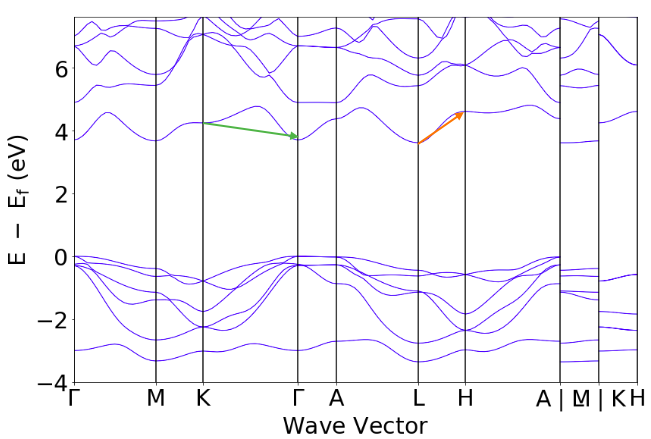

In [110]:
from IPython.display import Image
Image(filename='band_cond.png')

# 3. Masse effective
En supposant une dispertion parabolique.
la masse effective est définie comme : 
$$m^* = \frac{\hbar^2}{\frac{\delta^2 E}{\delta k^2}}$$

Pour les états optimums, l'énergie de l'électrons s'exprime :
$$\Delta E = E(k) - E(0) = \pm \frac{\hbar^2}{2m^*}(|{\bf k}|)^2$$

In [111]:
h = 6.582119570 * 1e-16
a = 4.2094982175295

## 3.1. Au sommet de la dernière bande de valence

In [112]:
# vbm: A list of tuples (distance,energy) marking the vbms. 
#The energies are shifted with respect to the fermi level is the option has been selected. 

vmb = bstructure.get_vbm()
k = vmb.get('kpoint').frac_coords
k_n = np.linalg.norm(k)
print (k_n)

#norme = 0
G = 2*np.pi/a
E = vmb['energy']

me = h**2*G**2/(2*E)
print(me)

0.0
4.203595311142151e-31


Comme $|{\bf k}|=0$, on va calculer la masse effective avec **G**, un vecteur du réseau réciproque.

Ce qui nous donne une masse effective, au sommet de la dernière bande de valence d'une valeur de **1.2357366098417937e-31** kg.

## 3.2. À la base de la première bande de conduction

In [113]:
# cbm: A list of tuples (distance,energy) marking the cbms. 
#The energies are shifted with respect to the fermi level is the option has been selected. 

cmb = bstructure.get_cbm()
k = cmb.get('kpoint').frac_coords
k_n = np.linalg.norm(k)
print(k_n)

#norme ≠ 0
E = cmb['energy']

me = h**2*k_n**2/(2*E)

print(me)


0.6689774736468438
2.0348173255934636e-32


Comme $|{\bf k}| \ne 0$, on peut la masse effective directement avec **k**, le vecteur d'onde du réseau direct.

Ce qui nous donne une masse effective, à la base de la première bande de conduction, d'une valeur de **2.0348173255934636e-32** kg.

# Bibliographie
[1] *Materials project mp-23205*, URL: https://materialsproject.org/materials/mp-23205/

[2] *MgI2_mp-23205_symmetrized.cif*, URL: https://github.com/laralej/lmapr1492/blob/master/MgI2_mp-23205_symmetrized.cif

[3] *Chapitre 3 : Introduction à la radiocristallographie*, URL: https://moodleucl.uclouvain.be/pluginfile.php/1274328/mod_resource/content/1/Chap-3.pdf